#DATA PREPROCESSING

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('df.csv')
# df['origin'].value_counts()

In [3]:
df.head()

,Used Date,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,...,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Category
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,...,47.5,81.1,11,Partly cloudy,0,90,9,1012,57,0
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,1


In [4]:
# Perform one-hot encoding on 'From' (origin) and 'To' (destination) columns
df_encoded = pd.get_dummies(df, columns=['From', 'To','Airline'], dtype= int, drop_first=True)

# Display the first few rows of the resulting DataFrame
df_encoded.head()


,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_CCU,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara
0,31-01-2020,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,0,1,0,1,0,0,0,0,0,0
1,31-01-2020,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,0,1,0,1,0,0,1,0,0,0
2,30-01-2020,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,0,1,0,1,0,0,0,0,0,0
3,30-01-2020,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,0,1,0,1,0,0,0,0,0,0
4,30-01-2020,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,0,1,0,1,0,0,0,0,0,0


In [5]:
# Convert the 'Used Date' column to datetime format
df_encoded['Used Date'] = pd.to_datetime(df_encoded['Used Date'], format='%d-%m-%Y')

# Create a new column 'Month' by extracting the month from 'Used Date'
df_encoded['Month'] = df_encoded['Used Date'].dt.month

# Display the first few rows to verify
df_encoded.head()


,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1


In [6]:
df_encoded

,Used Date,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,...,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara,Month
0,2020-01-31,06:05,605,06:04,604,08:15,815,08:16,816,-1,...,1,0,1,0,0,0,0,0,0,1
1,2020-01-31,04:50,450,04:36,436,07:00,700,06:55,655,-14,...,1,0,1,0,0,1,0,0,0,1
2,2020-01-30,06:05,605,05:54,554,08:15,815,08:02,802,-11,...,1,0,1,0,0,0,0,0,0,1
3,2020-01-30,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,...,1,0,1,0,0,0,0,0,0,1
4,2020-01-30,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,2019-01-24,18:30,1830,18:30,1830,20:55,2055,21:01,2101,0,...,0,1,0,0,0,0,1,0,0,1
10714,2019-01-23,18:30,1830,18:30,1830,20:55,2055,21:00,2100,0,...,0,1,0,0,0,0,1,0,0,1
10715,2019-01-22,18:30,1830,18:38,1838,20:55,2055,21:06,2106,8,...,0,1,0,0,0,0,1,0,0,1
10716,2019-01-09,22:05,2205,00:40,40,00:25,25,02:52,252,155,...,1,0,1,0,0,0,0,1,0,1


In [7]:
# Assuming you have pandas imported and df_encoded defined
unique_categories = df_encoded['weather__hourly__weatherDesc__value'].unique()
print(unique_categories)


['Partly cloudy' 'Cloudy' 'Patchy rain possible' 'Clear' 'Sunny'
 'Light rain shower' 'Patchy light drizzle' 'Overcast' 'Light drizzle'
 'Mist' 'Moderate or heavy rain shower' 'Thundery outbreaks possible'
 'Moderate rain at times' 'Moderate or heavy rain with thunder'
 'Patchy light rain with thunder' 'Moderate rain' 'Torrential rain shower'
 'Patchy light rain' 'Heavy rain at times' 'Heavy rain']


In [8]:
category_counts = df_encoded['weather__hourly__weatherDesc__value'].value_counts()
print(category_counts)


weather__hourly__weatherDesc__value
Partly cloudy                          6452
Clear                                  1111
Patchy rain possible                    936
Sunny                                   739
Cloudy                                  511
Light rain shower                       363
Moderate or heavy rain shower           239
Overcast                                 83
Torrential rain shower                   74
Moderate rain at times                   55
Thundery outbreaks possible              47
Patchy light rain with thunder           42
Mist                                     26
Moderate or heavy rain with thunder      10
Patchy light drizzle                      8
Patchy light rain                         7
Moderate rain                             5
Heavy rain at times                       5
Heavy rain                                3
Light drizzle                             2
Name: count, dtype: int64


In [9]:
# Define a mapping based on the severity of the weather conditions
# Lower values represent better weather conditions, higher values represent worse conditions.
weather_mapping = {
    'Sunny': 0,
    'Clear': 1,
    'Partly cloudy': 2,
    'Cloudy': 3,
    'Overcast': 4,
    'Light rain shower': 5,
    'Patchy rain possible': 6,
    'Moderate or heavy rain shower': 7,
    'Moderate rain at times': 8,
    'Moderate rain': 9,
    'Thundery outbreaks possible': 10,
    'Patchy light rain with thunder': 11,
    'Heavy rain at times': 12,
    'Heavy rain': 13,
    'Light drizzle': 14,
    'Patchy light drizzle': 15,
    'Mist': 16,
    'Torrential rain shower': 17,
    'Patchy light rain': 18,
    'Moderate or heavy rain with thunder': 19
}

# Apply this mapping to create a new encoded column
df_encoded['weather__hourly__weatherDesc__value_encoded'] = df_encoded['weather__hourly__weatherDesc__value'].map(weather_mapping)

# Display the first few rows to verify the new encoded column
df_encoded[['weather__hourly__weatherDesc__value', 'weather__hourly__weatherDesc__value_encoded']].head()


,weather__hourly__weatherDesc__value,weather__hourly__weatherDesc__value_encoded
0,Partly cloudy,2
1,Partly cloudy,2
2,Partly cloudy,2
3,Partly cloudy,2
4,Partly cloudy,2


In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop('Departure Delay', axis=1), df_encoded['Departure Delay'], test_size=0.2, random_state=42)
scaler = StandardScaler()
columns_to_standardize = ['Distance', 'Passenger Load Factor','Airline Rating', 'Airport Rating', 'Market Share', 'OTP Index',
       'weather__hourly__windspeedKmph','weather__hourly__precipMM', 'weather__hourly__humidity',
       'weather__hourly__visibility', 'weather__hourly__pressure',
       'weather__hourly__cloudcover', 'Category']
x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])
x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])

In [11]:
x_train.drop(columns=['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR','Arrival Delay',
        'weather__hourly__weatherDesc__value',
       ], inplace=True)
x_test.drop(columns=['Used Date', 'Scheduled Departure', 'SDEP', 'Departure', 'DEP',
       'Scheduled Arrival', 'SARR', 'Arrival', 'ARR','Arrival Delay',
        'weather__hourly__weatherDesc__value',
       ], inplace=True)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

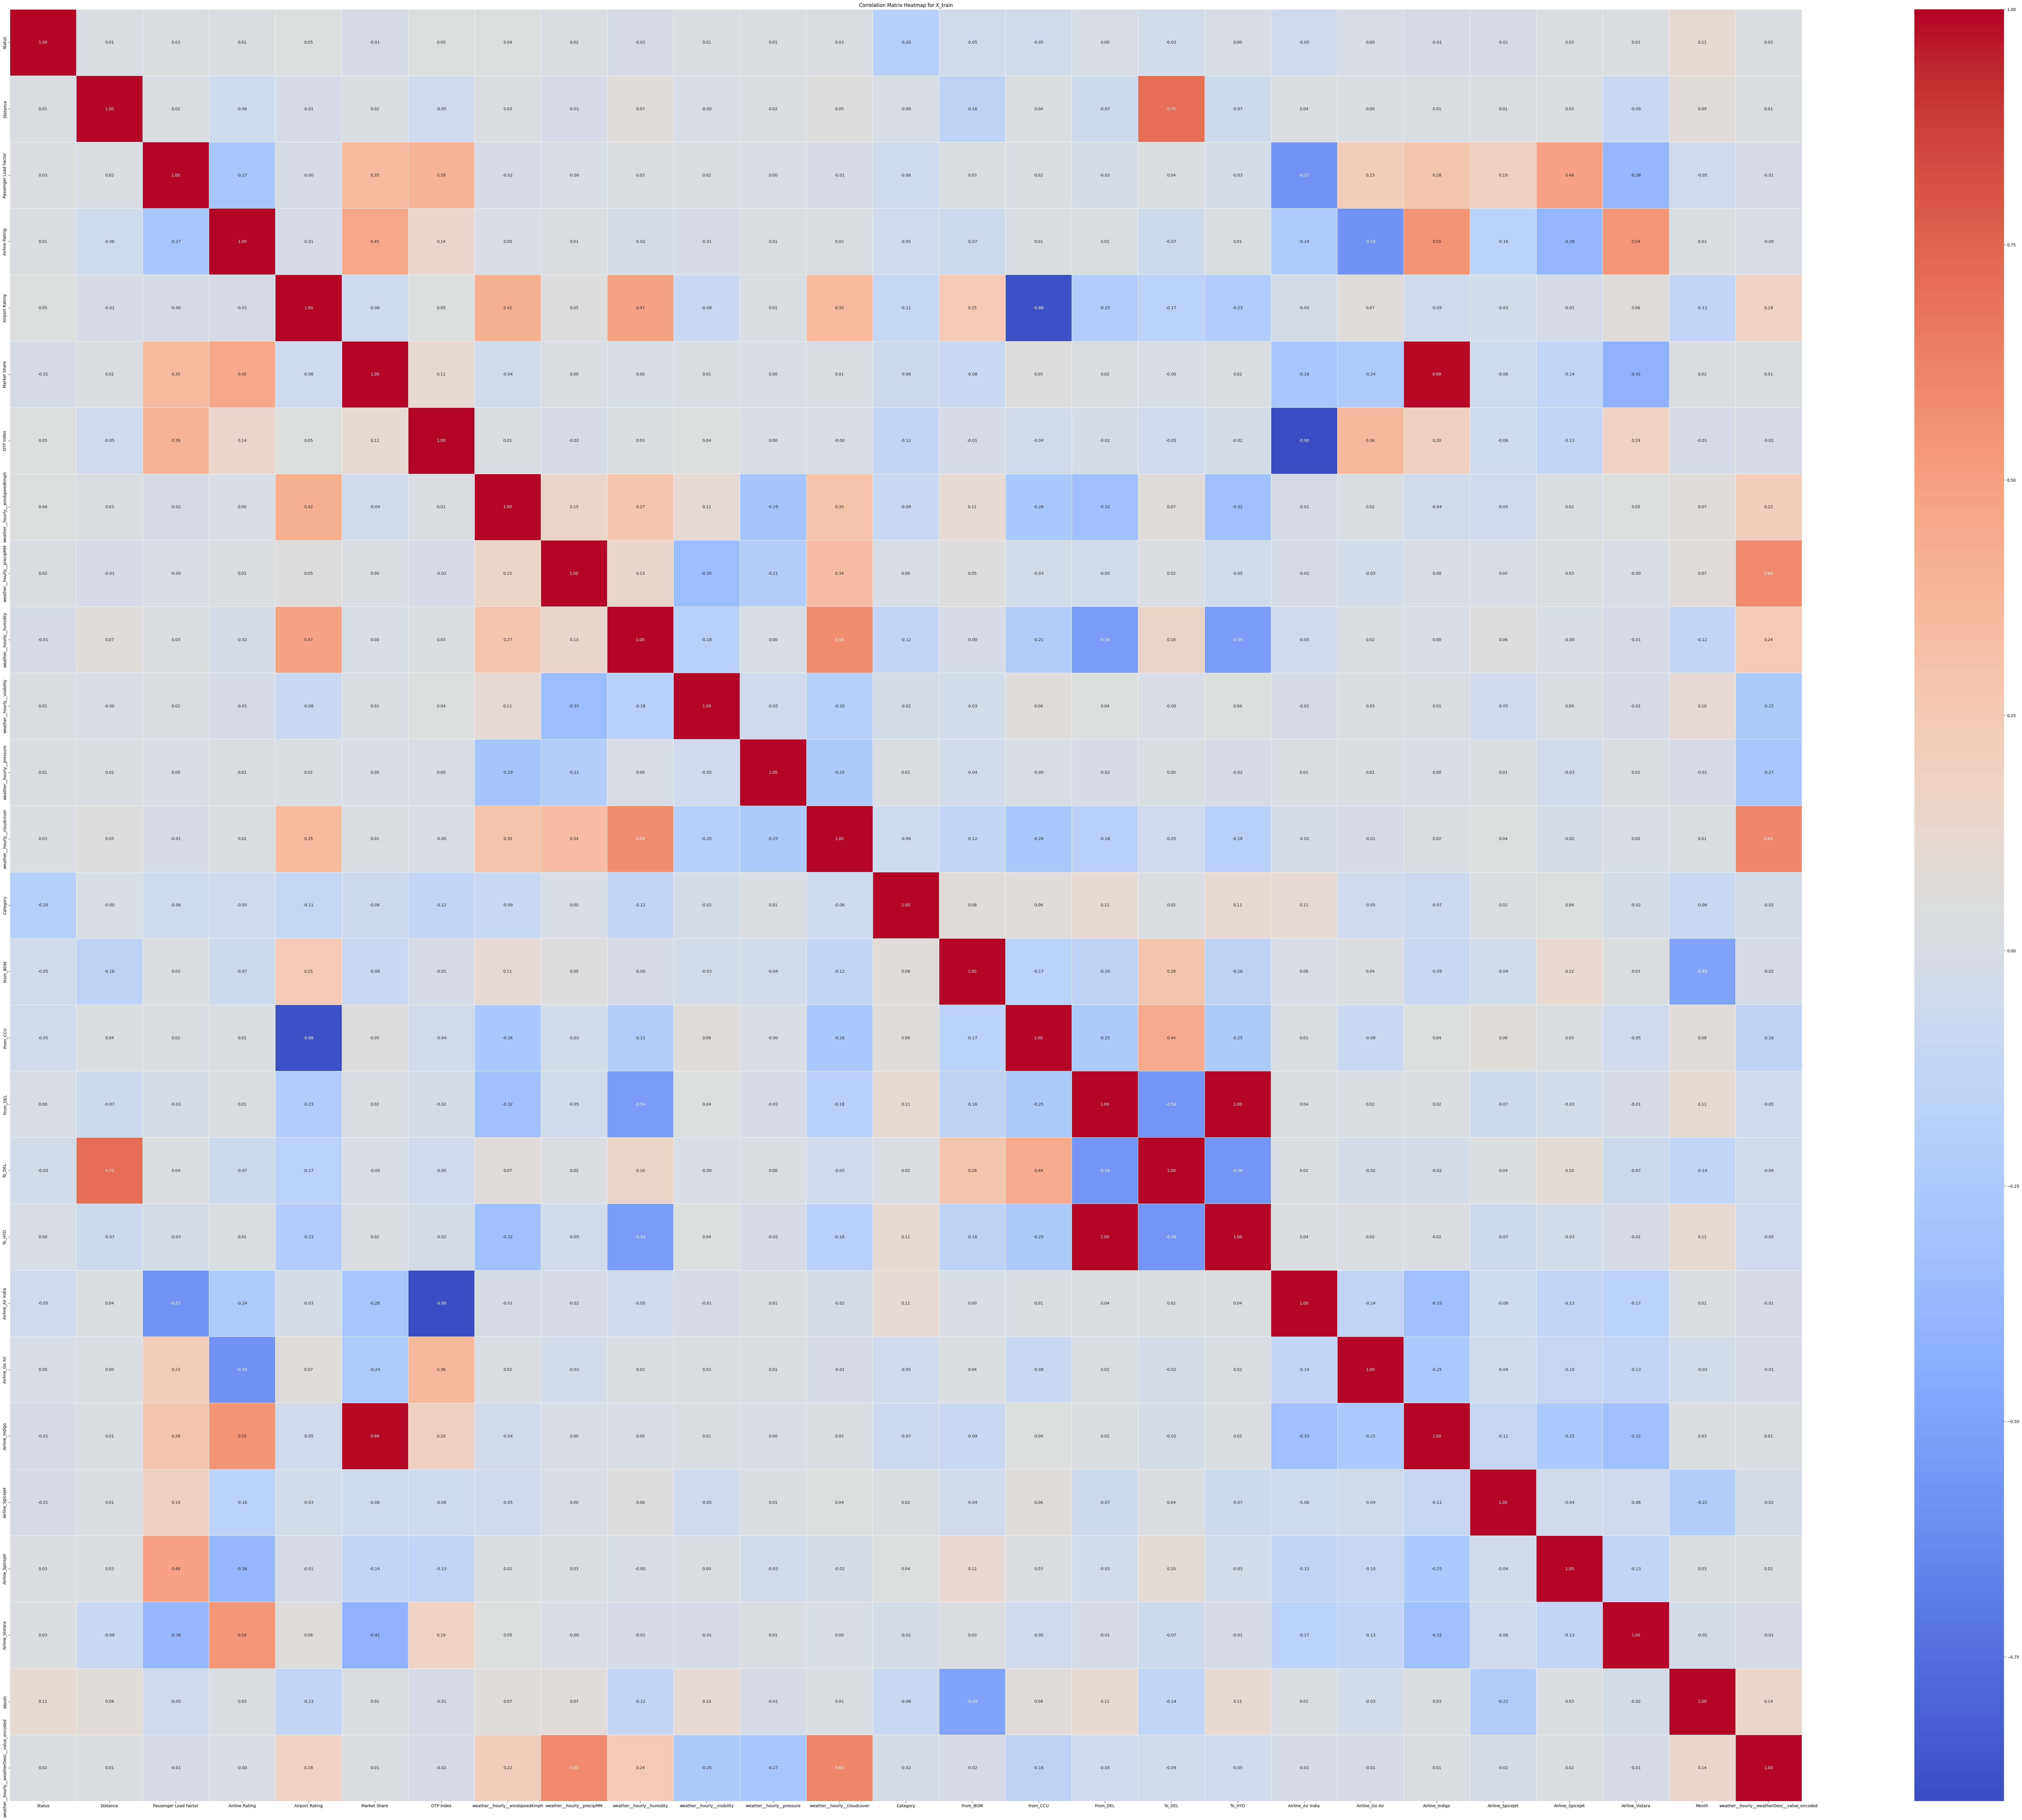

In [13]:
plt.figure(figsize=(100, 80))  # Set the figure size
sns.heatmap(x_train.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap for X_train')
plt.show()

In [14]:
correlation_matrix = x_train.corr()

print(correlation_matrix)


                                               Status  Distance  \
Status                                       1.000000  0.008217   
Distance                                     0.008217  1.000000   
Passenger Load Factor                        0.032163  0.017040   
Airline Rating                               0.011706 -0.060521   
Airport Rating                               0.045918 -0.005126   
Market Share                                -0.010841  0.024020   
OTP Index                                    0.046301 -0.054348   
weather__hourly__windspeedKmph               0.044901  0.027712   
weather__hourly__precipMM                    0.017191 -0.011555   
weather__hourly__humidity                   -0.006289  0.070229   
weather__hourly__visibility                  0.011622 -0.000387   
weather__hourly__pressure                    0.007611  0.019960   
weather__hourly__cloudcover                  0.025727  0.053566   
Category                                    -0.197802 -0.00109

#MODEL TRAINING

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance with all features:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Performance with all features:
Mean Absolute Error: 7.136762057789311
R² Score: 0.9630962364528914


In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [18]:
print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.9693591880936536
testing 0.8378917444494721


In [19]:
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [20]:
x_train.shape

(8574, 27)

In [21]:
duplicate_columns = get_duplicate_columns(x_train)
duplicate_columns

{'From_DEL': ['To_HYD']}

In [22]:
for one_list in duplicate_columns.values():
    x_train.drop(columns=one_list,inplace=True)
    x_test.drop(columns=one_list,inplace=True)

In [23]:
x_train.shape

(8574, 26)

In [24]:
corr_matrix = x_train.corr()

In [25]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.8:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))
columns_to_drop = set(columns_to_drop)

1


In [26]:
columns_to_drop

{'Airline_Indigo'}

In [27]:
x_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
x_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

#EVALUATION AND TESTING

In [28]:
print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.9693959041312219
testing 0.848662750649716


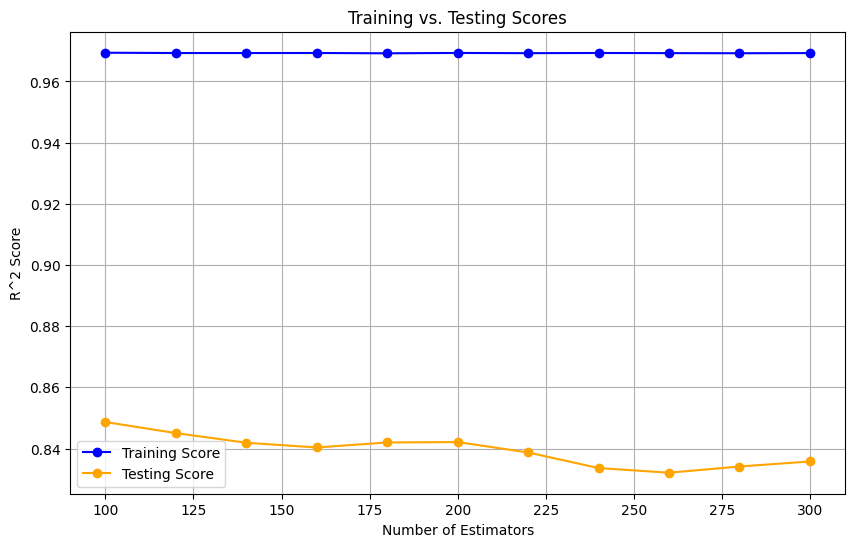

In [129]:
n_estimators_range = range(100, 301, 20)
train_scores = []
test_scores = []

# Calculate training and testing scores
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(n_estimators_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

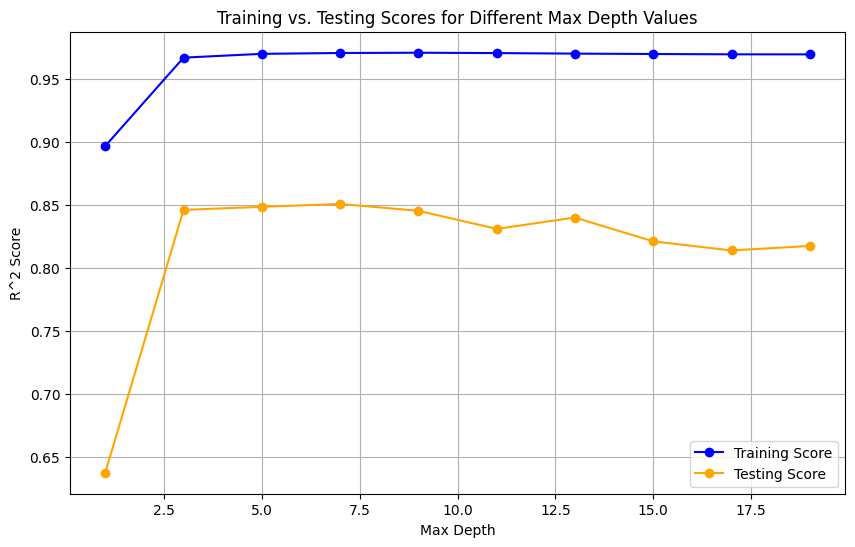

In [130]:
max_depth_range = range(1, 21, 2)  # Testing values from 1 to 20
train_scores = []
test_scores = []

# Calculate training and testing scores
for max_depth in max_depth_range:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(max_depth_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Max Depth Values')
plt.xlabel('Max Depth')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

In [131]:
best_max_depth = max_depth_range[np.argmax(test_scores)]  # Use test_scores here
print(f"Best max_depth: {best_max_depth}")

Best max_depth: 7


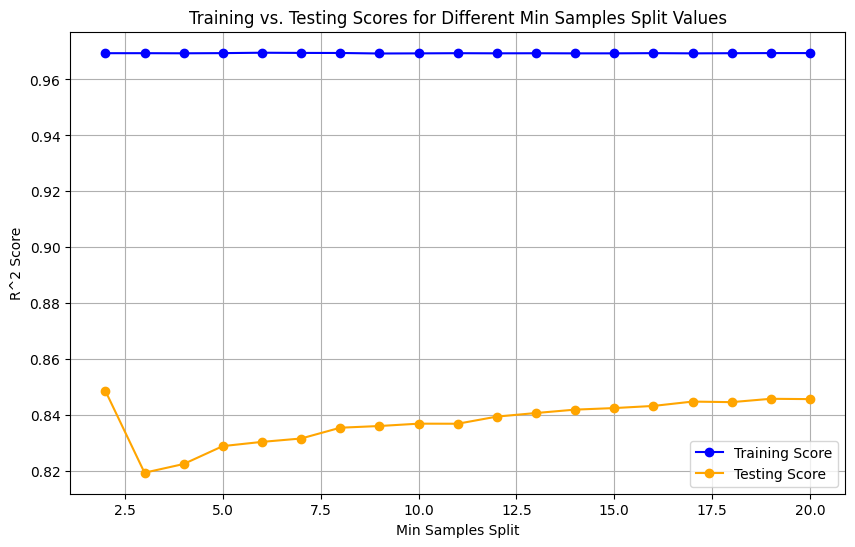

In [132]:
min_samples_split_range = range(2, 21)  # Testing values from 2 to 20
train_scores = []
test_scores = []

# Calculate training and testing scores
for min_samples_split in min_samples_split_range:
    model = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(min_samples_split_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Min Samples Split Values')
plt.xlabel('Min Samples Split')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

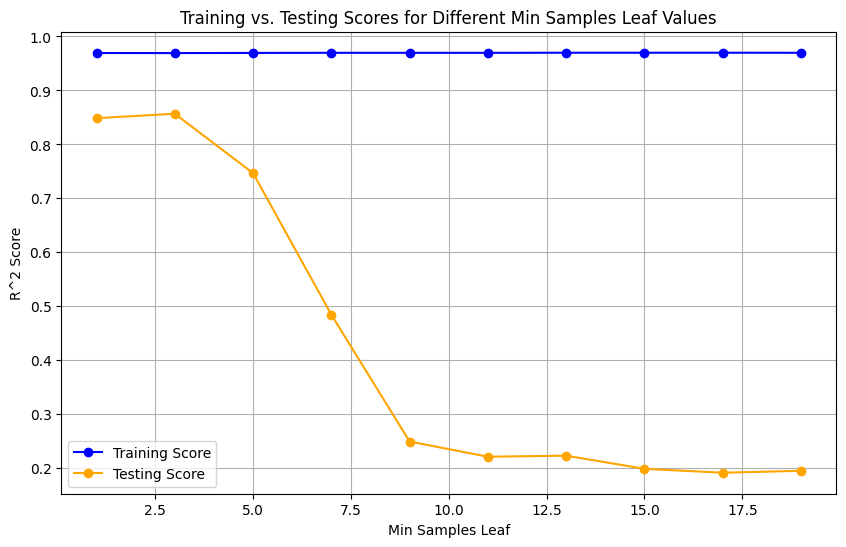

In [133]:
min_samples_leaf_range = range(1, 21, 2)  # Testing values from 1 to 20
train_scores = []
test_scores = []

# Calculate training and testing scores
for min_samples_leaf in min_samples_leaf_range:
    model = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)

    # Cross-validate on training data
    train_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_score)

    # Cross-validate on testing data
    test_score = cross_val_score(model, x_test, y_test, cv=5, scoring='r2').mean()
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_range, train_scores, marker='o', label='Training Score', color='blue')
plt.plot(min_samples_leaf_range, test_scores, marker='o', label='Testing Score', color='orange')
plt.title('Training vs. Testing Scores for Different Min Samples Leaf Values')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()

Neural Network

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9705.2568 - mae: 36.8535 - val_loss: 459.7257 - val_mae: 14.8458
Epoch 2/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 371.8763 - mae: 12.0380 - val_loss: 230.9399 - val_mae: 9.3598
Epoch 3/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 273.2610 - mae: 10.1953 - val_loss: 202.2915 - val_mae: 9.0719
Epoch 4/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 280.7959 - mae: 10.3620 - val_loss: 204.3833 - val_mae: 8.7441
Epoch 5/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 222.6480 - mae: 9.1378 - val_loss: 203.6885 - val_mae: 9.2345
Epoch 6/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180.5954 - mae: 8.7231 - val_loss: 225.1339 - val_mae: 9.7565
Epoch 7/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 226.2824 - mae: 9.0642 - val_loss: 148.8878 - val_mae: 6.8526
Epoch 8/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 218.7544 - mae: 8.7661 - val_loss: 183.3504 - val_mae: 8.8721
Epoch 9/50
268/268 ━━━━━━━━━━

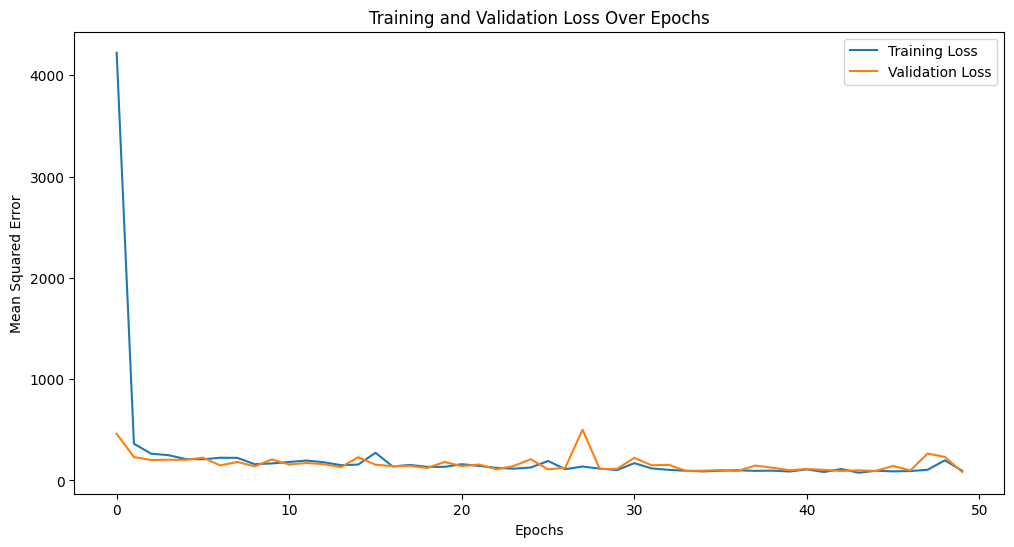

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('df.csv')

# Parse datetime columns and handle errors
df['Scheduled Departure'] = pd.to_datetime(df['Scheduled Departure'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['Scheduled Arrival'] = pd.to_datetime(df['Scheduled Arrival'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Map weather descriptions to numerical values
weather_mapping = {
    'Sunny': 0, 'Clear': 1, 'Partly cloudy': 2, 'Cloudy': 3, 'Overcast': 4,
    'Light rain shower': 5, 'Patchy rain possible': 6, 'Moderate or heavy rain shower': 7,
    'Moderate rain at times': 8, 'Moderate rain': 9, 'Thundery outbreaks possible': 10,
    'Patchy light rain with thunder': 11, 'Heavy rain at times': 12, 'Heavy rain': 13,
    'Light drizzle': 14, 'Patchy light drizzle': 15, 'Mist': 16, 'Torrential rain shower': 17,
    'Patchy light rain': 18, 'Moderate or heavy rain with thunder': 19
}
df['weather__hourly__weatherDesc__value'] = df['weather__hourly__weatherDesc__value'].map(weather_mapping)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['From', 'To', 'Airline'], drop_first=True)

# Drop unnecessary columns and separate features/target
predict_df = df_encoded.drop(columns=['Scheduled Departure', 'Scheduled Arrival', 'Used Date', 'Departure', 'Arrival'])
X = predict_df.drop(['Departure Delay'], axis=1)
y = predict_df['Departure Delay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
columns_to_standardize = ['Distance', 'Passenger Load Factor', 'Airline Rating', 'Airport Rating', 'Market Share',
                          'OTP Index', 'weather__hourly__windspeedKmph', 'weather__hourly__precipMM',
                          'weather__hourly__humidity', 'weather__hourly__visibility',
                          'weather__hourly__pressure', 'weather__hourly__cloudcover', 'Category']
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

# Build the neural network model
def build_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize and train the model
model = build_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Random Forest Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=25,  # Number of parameter settings sampled
    cv=5,  # Cross-validation folds
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best R² Score from Randomized Search: ", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best R² Score from Randomized Search:  0.9492038512079223


In [31]:
# Using best parameters found in Randomized Search
best_rf_model = random_search.best_estimator_
test_score = best_rf_model.score(x_test, y_test)
print("Test R² Score with Best Parameters: ", test_score)


Test R² Score with Best Parameters:  0.9460293089050434


In [32]:
def predict_arrival_delay(input_data):
    # Get the feature names used during training
    training_feature_names = best_rf_model.feature_names_in_

    # Convert training_feature_names to a list if it's not already
    training_feature_names = list(training_feature_names)

    # Check for missing columns in input_data
    missing_cols = [col for col in training_feature_names if col not in input_data.columns]
    if missing_cols:
        raise KeyError(f"The following columns are missing in the input data: {missing_cols}")

    # Select only the relevant columns from the input data
    input_data_subset = input_data[training_feature_names]

    # Scale the relevant columns
    input_data_scaled = scaler.transform(input_data_subset[columns_to_standardize])
    input_data_subset[columns_to_standardize] = input_data_scaled

    return best_rf_model.predict(input_data_subset)  # Use the subset with correct columns

In [33]:
# Display actual and predicted arrival delays side by side
results_df = pd.DataFrame({
    'Actual Arrival Delay': y_test,
    'Predicted Arrival Delay': y_pred
}).reset_index(drop=True)

# Show the first few rows of actual vs. predicted
print(results_df.head())

   Actual Arrival Delay  Predicted Arrival Delay
0                     0                   -0.990
1                    -3                   -1.640
2                     7                    5.718
3                    10                    9.460
4                     5                    5.180


In [34]:
# Display actual and predicted arrival delays side by side
results_df = pd.DataFrame({
    'Actual Arrival Delay': y_test,
    'Predicted Arrival Delay': y_pred
}).reset_index(drop=True)

# Show the first few rows of actual vs. predicted
print(results_df.head())

   Actual Arrival Delay  Predicted Arrival Delay
0                     0                   -0.990
1                    -3                   -1.640
2                     7                    5.718
3                    10                    9.460
4                     5                    5.180


In [35]:
# Import the joblib library
import joblib

# Save the model and scaler
joblib.dump(best_rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


#Rescheduling

In [51]:
import joblib
import pandas as pd
import numpy as np

# Load pre-trained model and scaler
arrival_delay_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the dataset
df = pd.read_csv('df.csv')
df['Scheduled Departure'] = pd.to_datetime(df['Scheduled Departure'], errors='coerce')
df['Scheduled Arrival'] = pd.to_datetime(df['Scheduled Arrival'], errors='coerce')

# Map weather descriptions to numerical values
weather_mapping = {
    'Sunny': 0, 'Clear': 1, 'Partly cloudy': 2, 'Cloudy': 3, 'Overcast': 4,
    'Light rain shower': 5, 'Patchy rain possible': 6, 'Moderate or heavy rain shower': 7,
    'Moderate rain at times': 8, 'Moderate rain': 9, 'Thundery outbreaks possible': 10,
    'Patchy light rain with thunder': 11, 'Heavy rain at times': 12, 'Heavy rain': 13,
    'Light drizzle': 14, 'Patchy light drizzle': 15, 'Mist': 16, 'Torrential rain shower': 17,
    'Patchy light rain': 18, 'Moderate or heavy rain with thunder': 19
}
df['weather__hourly__weatherDesc__value'] = df['weather__hourly__weatherDesc__value'].map(weather_mapping)

# One-hot encode categorical variables and prepare features
df_encoded = pd.get_dummies(df, columns=['From', 'To', 'Airline'], drop_first=True)

# Ensure feature consistency with the model
expected_features = arrival_delay_model.feature_names_in_
x = df_encoded.reindex(columns=expected_features, fill_value=0)

# Scale features as per the model's expectations
x[scaler.feature_names_in_] = scaler.transform(x[scaler.feature_names_in_])

# Use the model to predict delays for the entire dataset
predicted_delays = arrival_delay_model.predict(x)
df['Predicted Delay'] = predicted_delays

# Define the schedule adjustment function based on predicted delay only
def adjust_schedule(row):
    # Apply predicted delay directly without further adjustments
    new_dep = row['Scheduled Departure'] + pd.to_timedelta(row['Predicted Delay'], unit='m')

    # Calculate new arrival based on adjusted departure and original flight duration
    original_duration = row['Scheduled Arrival'] - row['Scheduled Departure']
    new_arr = new_dep + original_duration  # Keep the same duration as planned

    return pd.Series([new_dep, new_arr])

# Apply schedule adjustments to all flights based on predicted delays
df[['Adjusted Departure', 'Adjusted Arrival']] = df.apply(adjust_schedule, axis=1)

# Calculate new delays based on adjusted schedule
df['New Departure Delay'] = (df['Adjusted Departure'] - df['Scheduled Departure']).dt.total_seconds() / 60
df['New Arrival Delay'] = (df['Adjusted Arrival'] - df['Scheduled Arrival']).dt.total_seconds() / 60

# Display final schedule with predicted and adjusted delays
print(df[['Scheduled Departure', 'Scheduled Arrival', 'Predicted Delay', 'Adjusted Departure', 'Adjusted Arrival', 'New Departure Delay', 'New Arrival Delay']])

<ipython-input-51-069420a35cfc>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Departure'] = pd.to_datetime(df['Scheduled Departure'], errors='coerce')
<ipython-input-51-069420a35cfc>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Arrival'] = pd.to_datetime(df['Scheduled Arrival'], errors='coerce')


      Scheduled Departure   Scheduled Arrival  Predicted Delay  \
0     2024-11-02 06:05:00 2024-11-02 08:15:00        -6.316113   
1     2024-11-02 04:50:00 2024-11-02 07:00:00        -6.350914   
2     2024-11-02 06:05:00 2024-11-02 08:15:00        -6.316113   
3     2024-11-02 17:40:00 2024-11-02 19:55:00        -6.316113   
4     2024-11-02 19:50:00 2024-11-02 22:10:00         3.611256   
...                   ...                 ...              ...   
10713 2024-11-02 18:30:00 2024-11-02 20:55:00        -0.974469   
10714 2024-11-02 18:30:00 2024-11-02 20:55:00         0.400158   
10715 2024-11-02 18:30:00 2024-11-02 20:55:00         6.826827   
10716 2024-11-02 22:05:00 2024-11-02 00:25:00       167.418400   
10717 2024-11-02 01:10:00 2024-11-02 03:20:00        22.476497   

                 Adjusted Departure              Adjusted Arrival  \
0     2024-11-02 05:58:41.033235660 2024-11-02 08:08:41.033235660   
1     2024-11-02 04:43:38.945151810 2024-11-02 06:53:38.945151810   


In [52]:
# Print predicted delay and actual delay side-by-side
print("Arrival vs Actual Delay:")
print(df[['Arrival Delay','New Arrival Delay']])

Arrival vs Actual Delay:
       Arrival Delay  New Arrival Delay
0                  1          -6.316113
1                 -5          -6.350914
2                -13          -6.316113
3                -13          -6.316113
4                  4           3.611256
...              ...                ...
10713              6          -0.974469
10714              5           0.400158
10715             11           6.826827
10716            147         167.418400
10717              5          22.476497

[10718 rows x 2 columns]


#DELAY CATEGORIZATION

In [40]:

from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

# Perform structure learning on X_train only
hc = HillClimbSearch(x_train)
best_model = hc.estimate(scoring_method=BicScore(x_train))

# Display the learned structure (edges)
print("Learned Structure:", best_model.edges())



  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('Distance', 'Airport Rating'), ('Distance', 'To_DEL'), ('Distance', 'From_BOM'), ('Distance', 'weather__hourly__weatherDesc__value_encoded'), ('Distance', 'Category'), ('Passenger Load Factor', 'Market Share'), ('Passenger Load Factor', 'Month'), ('Airline Rating', 'OTP Index'), ('Airline Rating', 'Airline_Vistara'), ('Airline Rating', 'Airline_Go Air'), ('Airport Rating', 'From_CCU'), ('Airport Rating', 'From_DEL'), ('Airport Rating', 'weather__hourly__humidity'), ('Airport Rating', 'weather__hourly__windspeedKmph'), ('Airport Rating', 'weather__hourly__pressure'), ('Airport Rating', 'weather__hourly__cloudcover'), ('Market Share', 'Airline Rating'), ('Market Share', 'Airline_Spicejet'), ('Market Share', 'Airline_SpiceJet'), ('OTP Index', 'Airline_Air India'), ('Category', 'Status'), ('Airline_Air India', 'Category'), ('Airline_Spicejet', 'Distance'), ('Month', 'Distance'), ('weather__hourly__weatherDesc__value_encoded', 'weather__hourly__precipMM'), ('weather__ho

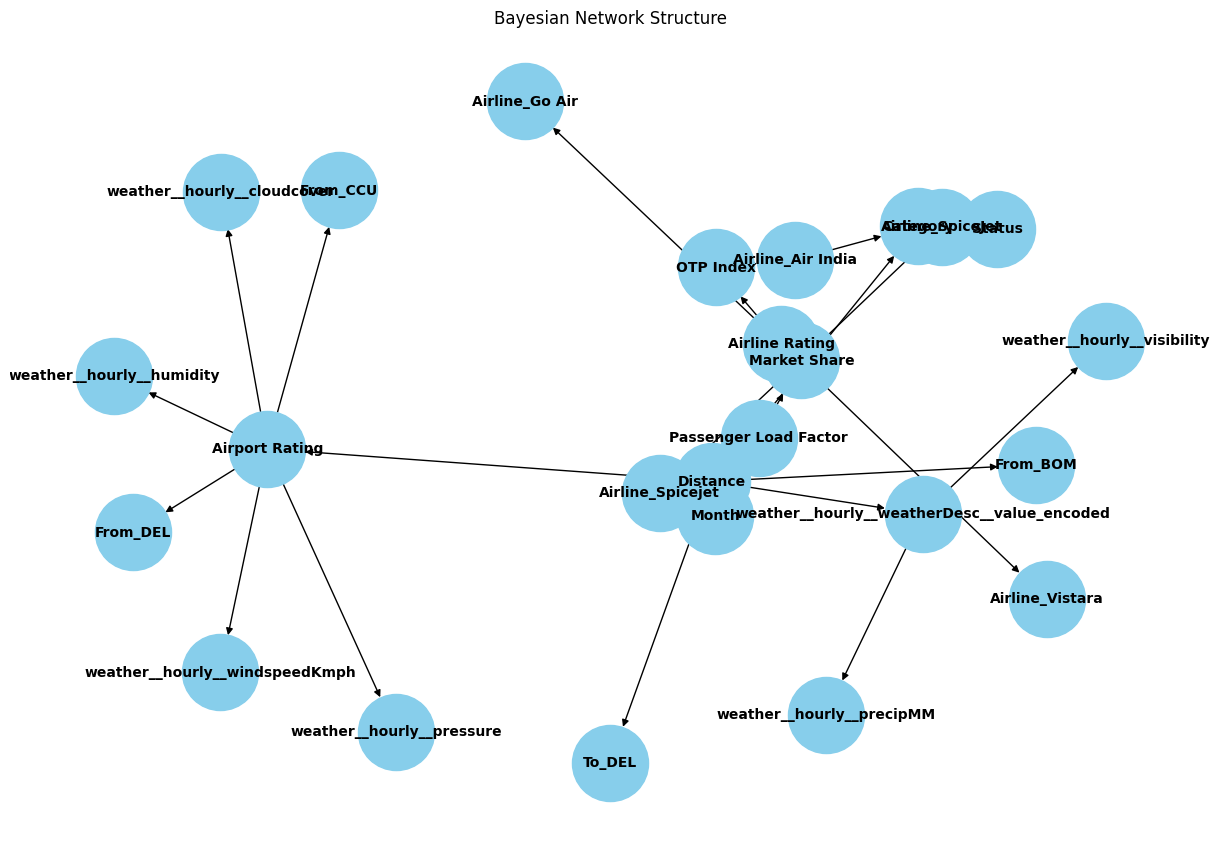

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert pgmpy Bayesian Network model to networkx graph for visualization
graph = nx.DiGraph()  # Directed graph for Bayesian Network
graph.add_edges_from(best_model.edges())  # Add edges to the graph

# Plot the Bayesian Network structure
plt.figure(figsize=(12, 8))
nx.draw(graph, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Bayesian Network Structure")
plt.show()



In [42]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.models import BayesianNetwork

# Initialize the Bayesian Network model with the learned structure
model = BayesianNetwork(best_model.edges())

# Fit the model using Maximum Likelihood Estimator
model.fit(x_train, estimator=MaximumLikelihoodEstimator)


In [43]:
from pgmpy.inference import VariableElimination

# Use Variable Elimination for inference on the fitted model
inference = VariableElimination(model)
delay_reason_proxies = {
    "Weather-related": ["weather__hourly__windspeedKmph", "weather__hourly__precipMM", "weather__hourly__visibility", "weather__hourly__humidity"],
    "Operational": ["Airline Rating", "OTP Index", "Airport Rating"],
    "Route-related": ["From_BOM", "From_DEL", "To_DEL", "Distance"]
}

# Dictionary to store delay reason probabilities for each row
row_delay_reasons = []

# Calculate probabilities for each row in X_test
for i, row in x_train.iterrows():
    evidence = row.to_dict()  # Convert row to dictionary for evidence
    reason_probabilities = {}

    for reason, nodes in delay_reason_proxies.items():
        group_prob = 1.0
        for node in nodes:
            try:
                node_prob = inference.query(variables=[node], evidence=evidence).values[1]  # Adjust for binary or non-binary
                group_prob *= node_prob
            except:
                group_prob *= 1  # Default to neutral if a query fails

        reason_probabilities[reason] = group_prob

    # Determine the most probable delay reason for this row
    most_probable_reason = max(reason_probabilities, key=reason_probabilities.get)
    row_delay_reasons.append((i, most_probable_reason, reason_probabilities[most_probable_reason]))

# Display the results
print(row_delay_reasons)


[(3469, 'Weather-related', 1.0), (2691, 'Weather-related', 1.0), (9829, 'Weather-related', 1.0), (9903, 'Weather-related', 1.0), (10097, 'Weather-related', 1.0), (4808, 'Weather-related', 1.0), (10106, 'Weather-related', 1.0), (9019, 'Weather-related', 1.0), (3706, 'Weather-related', 1.0), (1034, 'Weather-related', 1.0), (3934, 'Weather-related', 1.0), (3107, 'Weather-related', 1.0), (2458, 'Weather-related', 1.0), (906, 'Weather-related', 1.0), (7201, 'Weather-related', 1.0), (7839, 'Weather-related', 1.0), (9699, 'Weather-related', 1.0), (6688, 'Weather-related', 1.0), (10308, 'Weather-related', 1.0), (4139, 'Weather-related', 1.0), (10624, 'Weather-related', 1.0), (8975, 'Weather-related', 1.0), (2957, 'Weather-related', 1.0), (2271, 'Weather-related', 1.0), (4900, 'Weather-related', 1.0), (4870, 'Weather-related', 1.0), (2522, 'Weather-related', 1.0), (8822, 'Weather-related', 1.0), (3208, 'Weather-related', 1.0), (1901, 'Weather-related', 1.0), (9895, 'Weather-related', 1.0), (156